In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [39]:
Train_Data=pd.read_csv("customer_churn_dataset-training-master.csv")
Test_Data=pd.read_csv("customer_churn_dataset-testing-master.csv")

In [40]:
labelencoder=LabelEncoder()

In [41]:
Train_Data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [42]:
corr=Train_Data.corr()

C:\Users\bogaco\AppData\Local\Temp\ipykernel_10420\4112240984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=Train_Data.corr()


<AxesSubplot: >

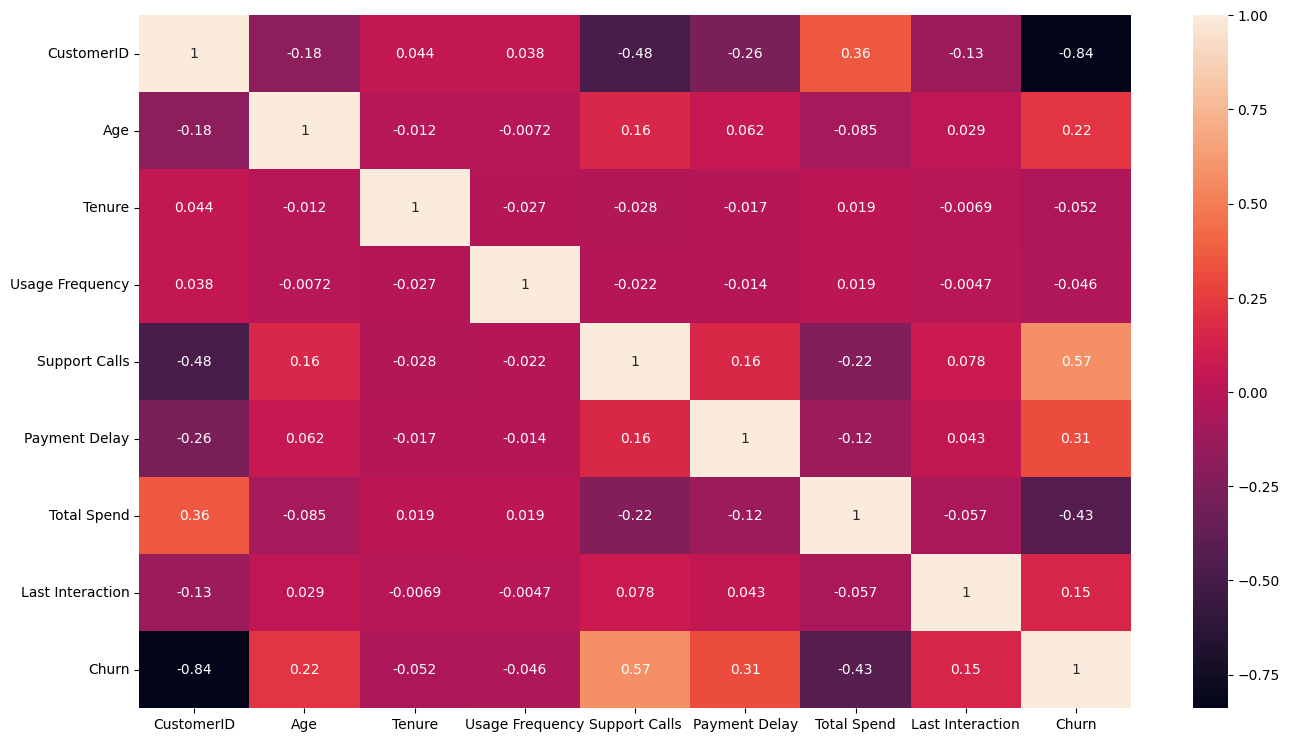

In [43]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

In [44]:
Train_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,440832.0,225398.667955,129531.918550,2.0,113621.75,226125.5,337739.25,449999.0
Age,440832.0,39.373153,12.442369,18.0,29.00,39.0,48.00,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.00,32.0,46.00,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.00,16.0,23.00,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.00,3.0,6.00,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.00,12.0,19.00,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.00,661.0,830.00,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.00,14.0,22.00,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.00,1.0,1.00,1.0


In [45]:
Train_Data["Subscription Type"]=labelencoder.fit_transform(Train_Data["Subscription Type"])
Train_Data["Contract Length"]=labelencoder.fit_transform(Train_Data["Contract Length"])
Train_Data["Gender"]=labelencoder.fit_transform(Train_Data["Gender"])
Test_Data["Subscription Type"]=labelencoder.fit_transform(Test_Data["Subscription Type"])
Test_Data["Contract Length"]=labelencoder.fit_transform(Test_Data["Contract Length"])
Test_Data["Gender"]=labelencoder.fit_transform(Test_Data["Gender"])

In [46]:
#Subscription Type= Basic:0, Premium:1, Standart:2
#Contract Length= Annual:0, Monthly:1, Quarterly:2
#Gender= Female:0, Male:1

In [47]:
Train_Data[Train_Data.isna().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN


In [48]:
Train_Data = Train_Data.drop(199295)


In [49]:
Train_Data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


In [50]:
X_train=Train_Data.drop(["CustomerID","Churn"],axis=1)
y_train=Train_Data["Churn"]
X_test=Test_Data.drop(["CustomerID","Churn"],axis=1)
y_test=Test_Data["Churn"]

In [52]:
from sklearn.preprocessing import StandardScaler



In [54]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
import lightgbm as lgb
import xgboost as xgb

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [56]:
LGB=lgb.LGBMClassifier()
LGB.fit(X_train,y_train)
LGB_Pred=LGB.predict(X_test)
LGB_Accuracy=accuracy_score(y_test,LGB_Pred)


[LightGBM] [Info] Number of positive: 249999, number of negative: 190833
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 482
[LightGBM] [Info] Number of data points in the train set: 440832, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.567107 -> initscore=0.270058
[LightGBM] [Info] Start training from score 0.270058


In [57]:
LGB_Accuracy

0.5034330630378724

In [58]:
XGB=xgb.XGBRFClassifier()
XGB.fit(X_train,y_train)
XGB_Pred=XGB.predict(X_test)
XGB_Accuracy=accuracy_score(y_test,XGB_Pred)

In [59]:
XGB_Accuracy

0.5441793270575077

In [60]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
LR_Pred=LR.predict(X_test)
LR_Accuracy=accuracy_score(y_test,LR_Pred)

In [61]:
LR_Accuracy

0.5867120265945879

In [78]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
RFC_Pred=RFC.predict(X_test)
RFC_Accuracy=accuracy_score(y_test,RFC_Pred)

In [63]:
RFC_Accuracy

0.5034175288159816

In [64]:
GNB=GaussianNB()
GNB.fit(X_train,y_train)
GNB_Pred=GNB.predict(X_test)
GNB_Accuracy=accuracy_score(y_test,GNB_Pred)

In [65]:
GNB_Accuracy

0.5727467611147358

In [66]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
DTC_Pred=DTC.predict(X_test)
DTC_Accuracy=accuracy_score(y_test,DTC_Pred)

In [67]:
DTC_Accuracy

0.5033709261503091

In [76]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
GBC_Pred=GBC.predict(X_test)
GBC_Accuracy=accuracy_score(y_test,GBC_Pred)

In [77]:
GBC_Accuracy

0.5062758256438935

In [88]:
for j in ["lbfgs","newton-cg","liblinear"]:
    for k in [1,2,5] :
        for i in [100,250,500]:
            LR = LogisticRegression(penalty="l2",    # Ceza türü: 'l1' veya 'l2'
                        C=k,           # Ceza parametresi
                        solver=j,  # Çözücü algoritması: 'newton-cg', 'lbfgs', 'liblinear', 'sag' veya 'saga'
                        max_iter=i,    # Maksimum iterasyon sayısı
                        multi_class='auto',  # Çok sınıflı problemlerde yaklaşım: 'ovr' veya 'multinomial'
                        class_weight=None)
            LR.fit(X_train,y_train)
            LR_Pred=LR.predict(X_test)
            LR_Accuracy=accuracy_score(y_test,LR_Pred)
            print("LR-",j," solver-",k," penalty-",i,"iteration's accuracy:",LR_Accuracy)

LR- lbfgs  solver- 1  penalty- 100 iteration's accuracy: 0.5867120265945879
LR- lbfgs  solver- 1  penalty- 250 iteration's accuracy: 0.5867120265945879
LR- lbfgs  solver- 1  penalty- 5000 iteration's accuracy: 0.5867120265945879
LR- lbfgs  solver- 2  penalty- 100 iteration's accuracy: 0.5867120265945879
LR- lbfgs  solver- 2  penalty- 250 iteration's accuracy: 0.5867120265945879
LR- lbfgs  solver- 2  penalty- 5000 iteration's accuracy: 0.5867120265945879
LR- lbfgs  solver- 50  penalty- 100 iteration's accuracy: 0.5867120265945879
LR- lbfgs  solver- 50  penalty- 250 iteration's accuracy: 0.5867120265945879
LR- lbfgs  solver- 50  penalty- 5000 iteration's accuracy: 0.5867120265945879
LR- newton-cg  solver- 1  penalty- 100 iteration's accuracy: 0.5867120265945879
LR- newton-cg  solver- 1  penalty- 250 iteration's accuracy: 0.5867120265945879
LR- newton-cg  solver- 1  penalty- 5000 iteration's accuracy: 0.5867120265945879
LR- newton-cg  solver- 2  penalty- 100 iteration's accuracy: 0.586712